## 2 The Tools of the Trade in Quantum Computing

### Using Qiskit Terra to build quantum circuits

we use packege **"qiskit"**

>In Qiskit, circuits are represented as objects of the QuantumCircuit class

For example, we can run **"QuantumCircuit(n, m)"**, which means we have n qubits and m classical bits (classical bits are used to store the results of measurements)

Qubits and classical bits in Qiskit are grouped in quantum and classical registers. By default, when you create a circuit QuantumCircuit(n, m), Qiskit groups your qubits in a quantum register q and your bits in a classical register c.

But we can also create our own registers:

In [34]:
from qiskit import *

qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

##### Quantum gates

All the qubits will be initialized to a state $\Ket{0}$

>As is often the case in Python, quantum bits in a circuit are 0-indexed

The following are the Qiskit methods for applying some of the most common one-qubit
gates on a qubit q0:

- **X, Y, Z** Pauli gates: x(q0), y(q0), z(q0)

- **H** Hadamard gate: h(q0)

- $R_X$, $R_Y$, $R_Z$ rotation gates: rx($\theta$, q0), ry($\theta$, q0), rz($\theta$, q0)

- $U(\theta,\phi,\lambda)$ universal one-qubit gate: u($\theta$,$\phi$,$\lambda$, q0)

If q0 represents the control qubit and qt the target qubit, we could apply the following gates:

- **CX, CY, CZ, CH** a controlled X,Y,X,H gate: cx(q0, qt), cy(q0, qt), cz(q0, qt), ch(q0, qt)

- **CRX, CRY, CRZ** a controlled rotation gate: crx($\theta$, q0, qt), cry($\theta$, q0, qt), crz($\theta$, q0, qt)


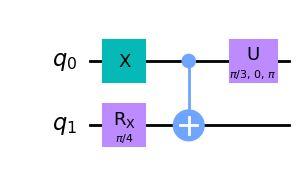

In [35]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")   

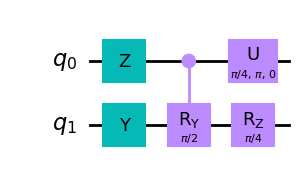

In [36]:
# Exercise 2.2
import numpy as np

qc = QuantumCircuit(2) 

qc.z(0)
qc.y(1)
qc.cry(np.pi*1/2,0,1)
qc.u(np.pi/4, np.pi, 0, 0)
qc.rz(np.pi/4, 1)

qc.draw("mpl")

##### Measurements

If we want to perform a measurement, we can do **measure(qbits, bits)** method, where qbits is the list of qubits to measure and bits is the list of bits where the result of the measurement will be stored, and it's obvious that the length of qbits and bits should be the same.

If we just want to measure all the qubits and do not want to bother with creating a classical register of the appropriate size, we can just call the **measure_all** method. If ywe have already added classical bits, we can set the add_bits parameter to False to avoid adding more bits.



#### Using Qiskit Aer to simulate quantum circuits

If we want to use the Aer simulator, we need to import the Aer package from Qiskit, and once we have done the necessary imports, we can create an Aer simulator object in one of the following ways

In [37]:
from qiskit.providers.aer import AerSimulator

sim = AerSimulator()
sim_GPU = AerSimulator(device="GPU")

If we want to measure a quantum state, we can do as follows:

In [50]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

job = execute(qc, sim, shots = 1024) # simulate the execution of nshots shots of a circuit qc
result = job.result() # retrieve a result object
counts = result.get_counts() # get the simulated frequency counts
print(counts)


{'01': 518, '00': 506}


It is better that we can represent the results by a histogram, which can be done by using the **plot_histogram** method from the qiskit.visualization package

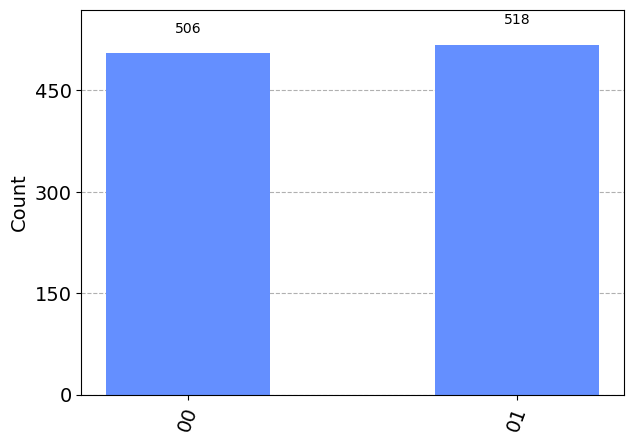

In [51]:
from qiskit.visualization import *
plot_histogram(counts)

If we want to access the state vector at any point in a quantum circuit qc, all we have to do is called **qc.save_statevector()**

In [69]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0) # using two individual instructions
qc.measure(1,1)

result = execute(qc, sim, shots = 1024).result()
sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)


Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'01': 518, '00': 506}


**At this point, we have temporarily stopped learning qiskit and entered the field of optimization problems.**

## 3 Working with Quadratic Unconstrained Binary Optimization Problems

Codeless content(end with chapter 3.2.2, page 97) is re-described in markdown files

#### Computing expectation values with Qiskit

we can first define one-qubit states |0⟩ and |1⟩ and compute their tensor products, one way is to directly use the amplitudes to initialize a Statevector object, code is as follows:

In [2]:
from qiskit.quantum_info import Statevector
zero = Statevector([1,0])
one = Statevector([0,1])
print("zero is", zero)
print("one is", one)

zero is Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
one is Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


The code above create $\Ket{0}$ and $\Ket{1}$.

A more convenient way of achieving the same result is to initialize the Statevector object from an integer such as 0 or 1. We will use the **from_int** method and it is important to also use the dims parameter to indicate the size of the statevector. In general, we will have to set dims to $2^𝑛$, the code is as follows:


In [3]:
zero = Statevector.from_int(0, dims = 2)
one = Statevector.from_int(1, dims = 2)
print("zero is",zero)
print("one is",one)

zero is Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
one is Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In either case, we can now construct states with a higher number of qubits by computing tensor products with the tensor method, as shown in the following lines:

In [8]:
psi = one.tensor(zero.tensor(zero))
print("psi is",psi)

# The following lines show a more concise way of using tensor products 
# and a much more beautiful way of presenting states, 
# but they achieve exactly the same result as the code shown previously:
psi = one^zero^zero
psi.draw("latex")

# a more easy way: psi = Statevector.from_int(4, dims = 8)


psi is Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

we can can simply multiply basis states by amplitudes and then add them together to create states that are in superposition

it's worth mentioning that in python ^ has a lower precedence than +, so we need the parenthesis for the operations to be performed in the desired order.

In [10]:
from numpy import sqrt
ghz = 1/sqrt(2)*(zero^zero^zero) + 1/sqrt(2)*(one^one^one)
ghz.draw("latex")

<IPython.core.display.Latex object>

For now, we will learn how to work with tensor products of 𝑍 gates.

The first method is to use a string to specify the positions of 𝑍 and 𝐼 matrices in the product. For instance, if we are working with three qubits and we want to create $𝑍_0𝑍_1$ (which is, as you surely remember, the tensor product 𝑍 ⊗ 𝑍 ⊗ 𝐼), we can use the following instructions:

In [11]:
from qiskit.quantum_info import Pauli
Z0Z1 = Pauli("ZZI")
print("Z0Z1 is",Z0Z1)
print("And its matrix is")
print(Z0Z1.to_matrix())

Z0Z1 is ZZI
And its matrix is
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


The matrix representing 𝑍0𝑍1 is of size 8 × 8 and, as you can see, it can be hard to read.

Fortunately, we can use the fact that tensor products of diagonal matrices are always diagonal, and print only the non-zero coefficients with the following instructions:

In [12]:
print("The sparse representation of Z0Z1 is")
print(Z0Z1.to_matrix(sparse=True))

The sparse representation of Z0Z1 is
  (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(-1+0j)
  (3, 3)	(-1+0j)
  (4, 4)	(-1+0j)
  (5, 5)	(-1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)


The main drawback of working with Pauli objects is that we cannot add them or multiply them by scalars. To get something like 𝑍0𝑍1 + 𝑍1𝑍2, we need first to convert the Pauli objects to PauliOp, which we can then add together as shown in the following code:

In [15]:
from qiskit.opflow.primitive_ops import PauliOp
H_cut = PauliOp(Pauli("ZZI")) + PauliOp(Pauli("ZIZ"))
print("H_cut is")
print(H_cut)
print("The sparse representation of H_cut is")
print(H_cut.to_spmatrix())

# A more compact way of obtaining the same Hamiltonian is:
from qiskit.opflow import I, Z
H_cut = (Z^Z^I) + (Z^I^Z)
print("H_cut is: ")
print(H_cut)

H_cut is
1.0 * ZZI
+ 1.0 * ZIZ
The sparse representation of H_cut is
  (0, 0)	(2+0j)
  (3, 3)	(-2+0j)
  (4, 4)	(-2+0j)
  (7, 7)	(2+0j)
H_cut is: 
1.0 * ZZI
+ 1.0 * ZIZ


C:\Users\Newt\AppData\Local\Temp\ipykernel_26652\27197005.py:2: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut = PauliOp(Pauli("ZZI")) + PauliOp(Pauli("ZIZ"))


Now we are ready to compute expectation values. Thanks to the code that we have written and executed so far, psi stores |100⟩ and H_cut stores 𝑍0𝑍1 + 𝑍1𝑍2:

In [16]:
print("The expectation value is", psi.expectation_value(H_cut))

The expectation value is (-2+0j)


In [3]:
# Exercise 3.4
# Write code to compute the expectation value of all the possible cuts of the graph in Figure 3.5. How many optimal solutions are there?

from qiskit.quantum_info import Pauli
from qiskit.opflow.primitive_ops import PauliOp
from qiskit.quantum_info import Statevector
from qiskit.opflow import I, Z
H_cut = (Z^Z^I) + (Z^I^Z)
for x in range(8): # We consider x=0,1...7
    psi = Statevector.from_int(x, dims = 8)
    print("The expectation value of |",x,">", "is",
    psi.expectation_value(H_cut))

The expectation value of | 0 > is (2+0j)
The expectation value of | 1 > is 0j
The expectation value of | 2 > is 0j
The expectation value of | 3 > is (-2+0j)
The expectation value of | 4 > is (-2+0j)
The expectation value of | 5 > is 0j
The expectation value of | 6 > is 0j
The expectation value of | 7 > is (2+0j)


we can evaluate expressions step by step, as shown in the following code, the evolve method is used to compute the matrix-vector multiplication, and inner
is, obviously, used for the inner product

In [6]:
print("The expectation value is", psi.inner(psi.evolve(H_cut)))

The expectation value is (2+0j)


Codeless content(start with chapter 3.3, page 140) is re-described in markdown files

the contend with code restarts here from chapter 4.2, page 167.

### 4.2 Quantum annealing

let's try to solve the MaxCut problem, we can pose it as finding the ground state of $Z_0Z_1 + Z_0Z_2$, which is an Ising Hamiltonian with $J_{01} = J_{02} = 1$. We can use the following code to create the Hamiltonian:


In [2]:
import dimod
J = {(0,1):1, (0,2):1}
h = {}
problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
print("The problem we are going to solve is:")
print(problem)

The problem we are going to solve is:
BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0}, {(1, 0): 1.0, (2, 0): 1.0}, 0.0, 'SPIN')


There are a couple of things to notice here. First, we have used J for the coefficients of the degree 2 terms — (0,1):1 sets the 𝐽01 coefficient to 1 and (0,2):1 sets 𝐽02 = 1 — and h for the linear ones. Those coefficients that we do not specify are automatically set to 0 by the BinaryQuadraticModel constructor, but we still need to pass both the J and the h parameters (even in our case, where the latter is empty). Notice that in the output we get (1, 0): 1.0, (2, 0): 1.0, which seems to be the reverse of what we used. But they are exactly the same, because 𝑍0𝑍1 = 𝑍1𝑍0 and, thus, the situation is symmetrical. Second, we have used 0.0 as the value for the offset, which is a constant term that can be added to the Hamiltonian. Finally, we have used the dimod.SPIN parameter because we are working with an Ising Hamiltonian and, thus, the values of our variables are 1 and −1. In just a minute, we will see how to use binary variables instead. But, before that, let’s use the following code to run the annealing process on one of the quantum annealers:

In [13]:
from dwave.system import DWaveSampler
from dwave.system import EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
result = sampler.sample(problem, num_reads=10)
print("The solutions that we have obtained are")
print(result)

The solutions that we have obtained are
   0  1  2 energy num_oc. chain_.
0 -1 +1 +1   -2.0       5     0.0
1 +1 -1 -1   -2.0       5     0.0
['SPIN', 2 rows, 10 samples, 3 variables]


In [4]:
result.info['timing']['qpu_access_time']

16521.77

For binary linear programming problems, we don't need to perform all the boring transformations, but dimod provides the ConstrainedQuadraticModel class, which simplifies the process of working with problems that involve linear constraints.
In order to instantiate our binary linear program as a ConstrainedQuadraticModel object, the first thing that we need to do is to define the variables that we want to use and their types. Consume that we have three binary variables that we can define with the following piece of code:

In [3]:
x0 = dimod.Binary("x0")
x1 = dimod.Binary("x1")
x2 = dimod.Binary("x2")

Now, we are going to define a ConstrainedQuadraticModel object and we are going to set the objective (the function that we seek to minimize) and also fix the constraints of the problem. The code is as follows:

In [5]:
blp = dimod.ConstrainedQuadraticModel()
blp.set_objective(-5*x0 + 3*x1 - 2*x2)
blp.add_constraint(x0 + x2 <= 1, "First constraint")
blp.add_constraint(3*x0 -x1 + 3*x2 <= 4, "Second constraint")

# wae can inspect the elements of blp by accessing its variables, objective, and constraints attributes
print("Our variables are:")
print(blp.variables)
print("Our objective is:")
print(blp.objective)
print("Our constraints are:")
print(blp.constraints)

Our variables are:
Variables(['x0', 'x1', 'x2'])
Our objective is:
ObjectiveView({'x0': -5.0, 'x1': 3.0, 'x2': -2.0}, {}, 0.0, {'x0': 'BINARY', 'x1': 'BINARY', 'x2': 'BINARY'})
Our constraints are:
{'First constraint': Le(ConstraintView({'x0': 1.0, 'x2': 1.0}, {}, 0.0, {'x0': 'BINARY', 'x2': 'BINARY'}), 1.0), 'Second constraint': Le(ConstraintView({'x0': 3.0, 'x1': -1.0, 'x2': 3.0}, {}, 0.0, {'x0': 'BINARY', 'x1': 'BINARY', 'x2': 'BINARY'}), 4.0)}


Notice that both the objective and the constraints are internally represented as quadratic functions and, therefore, they formally have quadratic terms, linear terms, and an offset or independent term. In our case, only the linear part of the constraints is non-empty, and the offset is 0 in both cases.

In [6]:
# compute the problem above:
sample1 = {"x0":1, "x1":1, "x2":1}
print("The assignment is", sample1)
print("Its cost is", blp.objective.energy(sample1))
print("Is it feasible?",blp.check_feasible(sample1))
print("The violations of the constraints are")
print(blp.violations(sample1))

The assignment is {'x0': 1, 'x1': 1, 'x2': 1}
Its cost is -4.0
Is it feasible? False
The violations of the constraints are
{'First constraint': 1.0, 'Second constraint': 1.0}


This tells us that the assignment is not feasible, and the violations method gives us the amount by which the left-hand side of each inequality is bigger than the right-hand side.

we can try another assignment, such as x0 = 0, x1 = 0, x2 = 1

In [7]:
sample2 = {"x0":0, "x1":0, "x2":1}
print("The assignment is", sample2)
print("Its cost is", blp.objective.energy(sample2))
print("Is it feasible?",blp.check_feasible(sample2))
print("The violations of the constraints are")
print(blp.violations(sample2))

The assignment is {'x0': 0, 'x1': 0, 'x2': 1}
Its cost is -2.0
Is it feasible? True
The violations of the constraints are
{'First constraint': 0.0, 'Second constraint': -1.0}


The dimod package also provides a brute-force solver that tries all possible assignments and sorts them according to their cost, from lowest to highest.

In [9]:
solver = dimod.ExactCQMSolver()
solution = solver.sample_cqm(blp)
print("The list of assignments is")
print(solution)

solution.first

The list of assignments is
  x0 x1 x2 energy num_oc. is_sat. is_fea.
6  1  0  1   -7.0       1 arra...   False
2  1  0  0   -5.0       1 arra...    True
7  1  1  1   -4.0       1 arra...   False
3  1  1  0   -2.0       1 arra...    True
4  0  0  1   -2.0       1 arra...    True
0  0  0  0    0.0       1 arra...    True
5  0  1  1    1.0       1 arra...    True
1  0  1  0    3.0       1 arra...    True
['INTEGER', 8 rows, 8 samples, 3 variables]


Sample(sample={'x0': 1, 'x1': 0, 'x2': 1}, energy=-7.0, num_occurrences=1, is_satisfied=array([False, False]), is_feasible=False)

The first number is just an identifier of the assignment. It is followed by the values given to the variables. Then, we find the cost of the assignment — or, rather, its energy, if interpreted in terms of the Hamiltonian. After that, comes the times this solution has been found, which will always be 1 with this solver. Finally, we find information about which constraints are satisfied and whether the solution is feasible or not. It is very important to notice that the assignments are ordered by cost, but some of them may be unfeasible, even the first one, as in this case.

If we want the optimal solution to the problem, you should always remove the unfeasible solutions first with the filter method, then if we access feasible_sols.first, you will get:

In [10]:
feasible_sols = solution.filter(lambda s: s.is_feasible)
feasible_sols.first

Sample(sample={'x0': 1, 'x1': 0, 'x2': 0}, energy=-5.0, num_occurrences=1, is_satisfied=array([ True,  True]), is_feasible=True)

As useful as the ConstrainedQuadraticModel class is, we cannot use it to define problems that can be run on quantum annealers. In order to do that, we first need to eliminate the constraints and create a BinaryQuadraticModel object that we can later execute on actual quantum hardware. The code is as follows:

In [11]:
y0, y1 = dimod.Binaries(["y0", "y1"])
cqm = dimod.ConstrainedQuadraticModel()
cqm.set_objective(-2*y0-3*y1)
cqm.add_constraint(y0 + 2*y1 <= 2)

#We can transform this constrained problem into an unconstrained one by using the cqm_to_bqm method as follows:
qubo, invert = dimod.cqm_to_bqm(cqm, lagrange_multiplier = 5)
print(qubo)

BinaryQuadraticModel({'y0': -17.0, 'y1': -23.0, 'slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_0': -15.0, 'slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_1': -15.0}, {('y1', 'y0'): 20.0, ('slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_0', 'y0'): 10.0, ('slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_0', 'y1'): 20.0, ('slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_1', 'y0'): 10.0, ('slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_1', 'y1'): 20.0, ('slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_1', 'slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_0'): 10.0}, 20.0, 'BINARY')


We can now use a quantum annealer to solve the problem defined in the qubo object:

In [14]:
sampler = EmbeddingComposite(DWaveSampler())
result = sampler.sample(qubo, num_reads=10)
print("The solutions that we have obtained are")
print(result)

The solutions that we have obtained are
  slack_vc7c95d7fb2f24eec9e85d1cdcd70062f_0 ... y1 energy num_oc. chain_.
0                                         0 ...  1   -3.0       3     0.0
1                                         0 ...  0   -2.0       2     0.0
2                                         1 ...  0   -2.0       3     0.0
3                                         0 ...  1    0.0       1     0.0
4                                         1 ...  0    0.0       1     0.0
['BINARY', 5 rows, 10 samples, 4 variables]


the invert object allows us to retrieve the solutions to the original problem from the solutions to the transformed one. Thus, we can run the following instructions:

In [16]:
samples = []
occurrences = []
for s in result.data():
    samples.append(invert(s.sample))
    occurrences.append(s.num_occurrences)
sampleset = dimod.SampleSet.from_samples_cqm(samples,cqm,num_occurrences=occurrences)
print("The solutions to the original problem are")
print(sampleset)

The solutions to the original problem are
  y0 y1 energy num_oc. is_sat. is_fea.
3  1  1   -5.0       1 arra...   False
0  0  1   -3.0       3 arra...    True
1  1  0   -2.0       2 arra...    True
2  1  0   -2.0       3 arra...    True
4  0  0    0.0       1 arra...    True
['INTEGER', 5 rows, 10 samples, 2 variables]


There are a couple of details that we still need to fix. 

The first one is that if we want to only retain the feasible solutions, we need to use the **filter** method as we did in the previous subsection when using ExactCMQSolver. The second has to do with the repetition — which we can observe in the last two outputs — of the solution that sets 𝑦0 = 1 and 𝑦0 = 0. These two solutions come from two different assignments in the transformed problem, but they only differed in the values given to the slack variables. So, when those slack variables are eliminated, they produce exactly the same assignment. If we want them to be considered together, as they should be, we can use the aggregate method. Putting it all together, we can execute this code:

In [17]:
final_sols = sampleset.filter(lambda s: s.is_feasible)
final_sols = final_sols.aggregate()
print("The final solutions are")
print(final_sols)

The final solutions are
  y0 y1 energy num_oc. is_sat. is_fea.
0  0  1   -3.0       3 arra...    True
1  1  0   -2.0       5 arra...    True
2  0  0    0.0       1 arra...    True
['INTEGER', 3 rows, 9 samples, 2 variables]
